In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split

In [26]:
import os

def count_images_in_subfolders(dataset_folder):
    # Mendapatkan daftar subfolder dalam folder dataset
    subfolders = [f.name for f in os.scandir(dataset_folder) if f.is_dir()]
    
    for subfolder in subfolders:
        subfolder_path = os.path.join(dataset_folder, subfolder)
        total_images = 0
        # Menghitung file gambar dalam subfolder
        for root, dirs, files in os.walk(subfolder_path):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                    total_images += 1
        print(f"Total gambar dalam folder '{subfolder}': {total_images}")

# Ganti dengan path folder dataset Anda
dataset_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset'
count_images_in_subfolders(dataset_folder)


Total gambar dalam folder 'Acne': 51
Total gambar dalam folder 'Bags': 19
Total gambar dalam folder 'Bopeng': 50
Total gambar dalam folder 'Bruntusan': 50
Total gambar dalam folder 'Milia': 50
Total gambar dalam folder 'Redness': 50


In [27]:
def split_dataset(source_folder, dest_train_folder, dest_test_folder, test_size=0.2):
    # Mendapatkan daftar subfolder di source_folder
    subfolders = [f.name for f in os.scandir(source_folder) if f.is_dir()]
    
    for subfolder in subfolders:
        subfolder_path = os.path.join(source_folder, subfolder)
        # Mendapatkan daftar file dalam subfolder
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        
        # Membagi data ke dalam train dan test
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
        
        # Membuat folder train dan test untuk subfolder jika belum ada
        train_subfolder = os.path.join(dest_train_folder, subfolder)
        test_subfolder = os.path.join(dest_test_folder, subfolder)
        
        os.makedirs(train_subfolder, exist_ok=True)
        os.makedirs(test_subfolder, exist_ok=True)
        
        # Menyalin file ke folder train
        for file in train_files:
            shutil.copy(os.path.join(subfolder_path, file), os.path.join(train_subfolder, file))
        
        # Menyalin file ke folder test
        for file in test_files:
            shutil.copy(os.path.join(subfolder_path, file), os.path.join(test_subfolder, file))
        
        print(f"Data untuk folder '{subfolder}' telah dibagi ke dalam folder 'train' dan 'test'.")

# Path ke folder dataset Anda
source_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset'

# Folder tujuan untuk train dan test
dest_train_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Train'
dest_test_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Test'

# Split dataset
split_dataset(source_folder, dest_train_folder, dest_test_folder)


Data untuk folder 'Acne' telah dibagi ke dalam folder 'train' dan 'test'.
Data untuk folder 'Bags' telah dibagi ke dalam folder 'train' dan 'test'.
Data untuk folder 'Bopeng' telah dibagi ke dalam folder 'train' dan 'test'.
Data untuk folder 'Bruntusan' telah dibagi ke dalam folder 'train' dan 'test'.
Data untuk folder 'Milia' telah dibagi ke dalam folder 'train' dan 'test'.
Data untuk folder 'Redness' telah dibagi ke dalam folder 'train' dan 'test'.


In [30]:
def count_images_in_folder(folder_path):
    total_images = 0
    # Menghitung file gambar dalam folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                total_images += 1
    return total_images

def count_images_in_train_test(train_folder, test_folder):
    # Daftar subfolder di dalam train dan test
    subfolders = [f.name for f in os.scandir(train_folder) if f.is_dir()]
    
    for subfolder in subfolders:
        train_subfolder_path = os.path.join(train_folder, subfolder)
        test_subfolder_path = os.path.join(test_folder, subfolder)
        
        # Menghitung gambar dalam folder train dan test
        train_images = count_images_in_folder(train_subfolder_path)
        test_images = count_images_in_folder(test_subfolder_path)
        
        print(f"Jumlah gambar di folder 'train/{subfolder}': {train_images}")
        print(f"Jumlah gambar di folder 'test/{subfolder}': {test_images}")

# Path ke folder 'train' dan 'test'
train_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Train'
test_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Test'

# Hitung jumlah gambar dalam train dan test
count_images_in_train_test(train_folder, test_folder)


Jumlah gambar di folder 'train/Acne': 40
Jumlah gambar di folder 'test/Acne': 11
Jumlah gambar di folder 'train/Bags': 15
Jumlah gambar di folder 'test/Bags': 4
Jumlah gambar di folder 'train/Bopeng': 40
Jumlah gambar di folder 'test/Bopeng': 10
Jumlah gambar di folder 'train/Bruntusan': 40
Jumlah gambar di folder 'test/Bruntusan': 10
Jumlah gambar di folder 'train/Milia': 40
Jumlah gambar di folder 'test/Milia': 10
Jumlah gambar di folder 'train/Redness': 40
Jumlah gambar di folder 'test/Redness': 10


In [31]:
from PIL import Image
import os

def get_image_shape(image_path):
    with Image.open(image_path) as img:
        return img.size  # mengembalikan (width, height)

def check_image_shapes_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                image_path = os.path.join(root, file)
                shape = get_image_shape(image_path)
                print(f"Shape of {file}: {shape}")

def check_shapes_in_train_test(train_folder, test_folder):
    # Daftar subfolder di dalam train dan test
    subfolders = [f.name for f in os.scandir(train_folder) if f.is_dir()]

    for subfolder in subfolders:
        train_subfolder_path = os.path.join(train_folder, subfolder)
        test_subfolder_path = os.path.join(test_folder, subfolder)
        
        print(f"Shapes for images in 'train/{subfolder}':")
        check_image_shapes_in_folder(train_subfolder_path)
        
        print(f"\nShapes for images in 'test/{subfolder}':")
        check_image_shapes_in_folder(test_subfolder_path)

# Path ke folder 'train' dan 'test'
train_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Train'
test_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Test'

# Memeriksa shape gambar dalam train dan test
check_shapes_in_train_test(train_folder, test_folder)


Shapes for images in 'train/Acne':
Shape of Acne_100.jpg: (360, 236)
Shape of Acne_101.jpg: (360, 237)
Shape of Acne_102.jpg: (360, 240)
Shape of Acne_104.jpg: (360, 236)
Shape of Acne_105.jpg: (360, 236)
Shape of Acne_55.jpg: (296, 360)
Shape of Acne_56.jpg: (360, 236)
Shape of Acne_57.jpg: (813, 474)
Shape of Acne_58.jpg: (360, 239)
Shape of Acne_59.jpg: (360, 236)
Shape of Acne_60.jpg: (360, 238)
Shape of Acne_63.jpg: (360, 237)
Shape of Acne_64.jpg: (360, 236)
Shape of Acne_65.jpg: (360, 237)
Shape of Acne_67.jpg: (296, 360)
Shape of Acne_68.jpg: (238, 360)
Shape of Acne_69.jpg: (818, 478)
Shape of Acne_70.jpg: (360, 237)
Shape of Acne_71.jpg: (360, 234)
Shape of Acne_72.jpg: (360, 237)
Shape of Acne_74.jpg: (360, 232)
Shape of Acne_75.jpg: (360, 233)
Shape of Acne_76.jpg: (360, 240)
Shape of Acne_77.jpg: (360, 236)
Shape of Acne_78.jpg: (360, 234)
Shape of Acne_82.jpg: (360, 302)
Shape of Acne_83.jpg: (360, 236)
Shape of Acne_84.jpg: (324, 360)
Shape of Acne_85.jpg: (360, 240)
Sha

In [32]:
from PIL import Image
import os

def resize_image(image_path, target_size=(256, 256)):
    with Image.open(image_path) as img:
        img_resized = img.resize(target_size)  # Ubah ukuran gambar
        return img_resized

def resize_images_in_folder(folder_path, target_size=(256, 256)):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                image_path = os.path.join(root, file)
                resized_image = resize_image(image_path, target_size)
                # Menyimpan gambar yang sudah diubah ukurannya
                resized_image.save(image_path)

# Path ke folder 'train' dan 'test'
train_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Train'
test_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Test'

# Ubah ukuran gambar dalam folder train dan test ke 224x224
resize_images_in_folder(train_folder, target_size=(256, 256))
resize_images_in_folder(test_folder, target_size=(256, 256))


In [33]:
from PIL import Image
import os

def get_image_shape(image_path):
    with Image.open(image_path) as img:
        return img.size  # mengembalikan (width, height)

def check_image_shapes_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                image_path = os.path.join(root, file)
                shape = get_image_shape(image_path)
                print(f"Shape of {file}: {shape}")

def check_shapes_in_train_test(train_folder, test_folder):
    # Daftar subfolder di dalam train dan test
    subfolders = [f.name for f in os.scandir(train_folder) if f.is_dir()]

    for subfolder in subfolders:
        train_subfolder_path = os.path.join(train_folder, subfolder)
        test_subfolder_path = os.path.join(test_folder, subfolder)
        
        print(f"Shapes for images in 'train/{subfolder}':")
        check_image_shapes_in_folder(train_subfolder_path)
        
        print(f"\nShapes for images in 'test/{subfolder}':")
        check_image_shapes_in_folder(test_subfolder_path)

# Path ke folder 'train' dan 'test'
train_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Train'
test_folder = r'C:\Users\LENOVO\Documents\Skinalyze\Dataset\Test'

# Memeriksa shape gambar dalam train dan test
check_shapes_in_train_test(train_folder, test_folder)


Shapes for images in 'train/Acne':
Shape of Acne_100.jpg: (256, 256)
Shape of Acne_101.jpg: (256, 256)
Shape of Acne_102.jpg: (256, 256)
Shape of Acne_104.jpg: (256, 256)
Shape of Acne_105.jpg: (256, 256)
Shape of Acne_55.jpg: (256, 256)
Shape of Acne_56.jpg: (256, 256)
Shape of Acne_57.jpg: (256, 256)
Shape of Acne_58.jpg: (256, 256)
Shape of Acne_59.jpg: (256, 256)
Shape of Acne_60.jpg: (256, 256)
Shape of Acne_63.jpg: (256, 256)
Shape of Acne_64.jpg: (256, 256)
Shape of Acne_65.jpg: (256, 256)
Shape of Acne_67.jpg: (256, 256)
Shape of Acne_68.jpg: (256, 256)
Shape of Acne_69.jpg: (256, 256)
Shape of Acne_70.jpg: (256, 256)
Shape of Acne_71.jpg: (256, 256)
Shape of Acne_72.jpg: (256, 256)
Shape of Acne_74.jpg: (256, 256)
Shape of Acne_75.jpg: (256, 256)
Shape of Acne_76.jpg: (256, 256)
Shape of Acne_77.jpg: (256, 256)
Shape of Acne_78.jpg: (256, 256)
Shape of Acne_82.jpg: (256, 256)
Shape of Acne_83.jpg: (256, 256)
Shape of Acne_84.jpg: (256, 256)
Shape of Acne_85.jpg: (256, 256)
Sha

In [35]:
TRAIN_DIR = 'Dataset/Train/'
VALIDATION_DIR = 'Dataset/Test/'

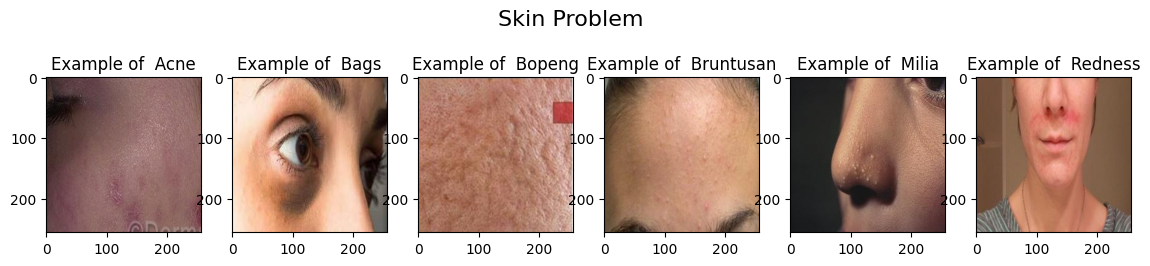

In [38]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Skin Problem', fontsize=16)

# Plot one image from the first 4 letters
for ii, problem in enumerate(['Acne' , 'Bags', 'Bopeng', 'Bruntusan', 'Milia', 'Redness']):
    dir = f'./Dataset/Train/{problem}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of  {problem}')

In [39]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (256, 256, 3)


In [40]:
sample_array[0,:5]

array([[114.,  79.,  60.],
       [114.,  79.,  60.],
       [114.,  79.,  60.],
       [114.,  79.,  60.],
       [114.,  79.,  60.]], dtype=float32)

In [54]:
# GRADED FUNCTION: train_val_datasets
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
    ### START CODE HERE ###
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(256, 256),
		label_mode='categorical',
        color_mode = "rgb", # Use this argument to get just one color dimension, because it is greyscale 
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(256, 256),
		label_mode='categorical',
        color_mode = "rgb", # Use this argument to get just one color dimension, because it imgs are greyscale 
    ) 
    ### END CODE HERE ###
    
    return train_dataset, validation_dataset

In [55]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   

Found 211 files belonging to 6 classes.
Found 55 files belonging to 6 classes.
Images of train dataset have shape: (None, 256, 256, 3)
Labels of train dataset have shape: (None, 6)
Images of validation dataset have shape: (None, 256, 256, 3)
Labels of validation dataset have shape: (None, 6)


In [61]:
# GRADED FUNCTION: create_model
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    ### START CODE HERE ###      
    
    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model = tf.keras.models.Sequential([ 
        # Define an input layer
        tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),  # Remove None from input shape
        
        # Rescale images
        tf.keras.layers.Rescaling(1./255),

        # First Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the output and add dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        # Output layer with units equal to the number of classes (24 for this dataset)
        tf.keras.layers.Dense(6, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(optimizer = "adam",
                  loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

    ### END CODE HERE ### 
    return model

In [62]:
# Create your model
model = create_model()

In [63]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 256, 256, 3)
Output shape: (None, 6)


In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,510,342 (120.20 MB)

 Trainable params: 31,510,342 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 6)


In [66]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1914 - loss: 6.0295 - val_accuracy: 0.1818 - val_loss: 1.8701
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2001 - loss: 1.8571 - val_accuracy: 0.2545 - val_loss: 1.6916
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3475 - loss: 1.5653 - val_accuracy: 0.4000 - val_loss: 1.5490
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5282 - loss: 1.2723 - val_accuracy: 0.4909 - val_loss: 1.4011
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6109 - loss: 0.9994 - val_accuracy: 0.6182 - val_loss: 1.2598
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7158 - loss: 0.9008 - val_accuracy: 0.5091 - val_loss: 1.1976
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7996 - loss: 0.6128 - val_accuracy: 0.6364 - val_loss: 1.1169
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8718 - loss: 0.3950 - val_accuracy: 0.6909 - val_loss: 1.1504
Epoch 9/15
7/7

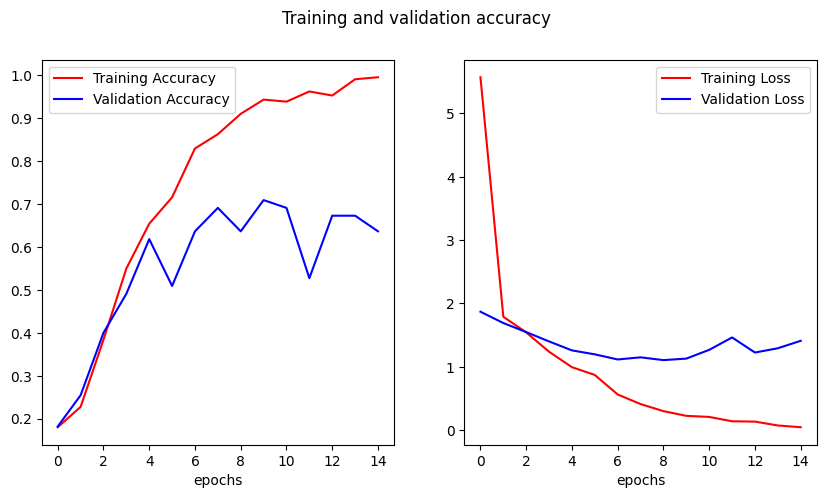

In [67]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()